In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


/home/hp/Personal/Personal Projects/LirneAsia/lirne/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 91.81186132618556


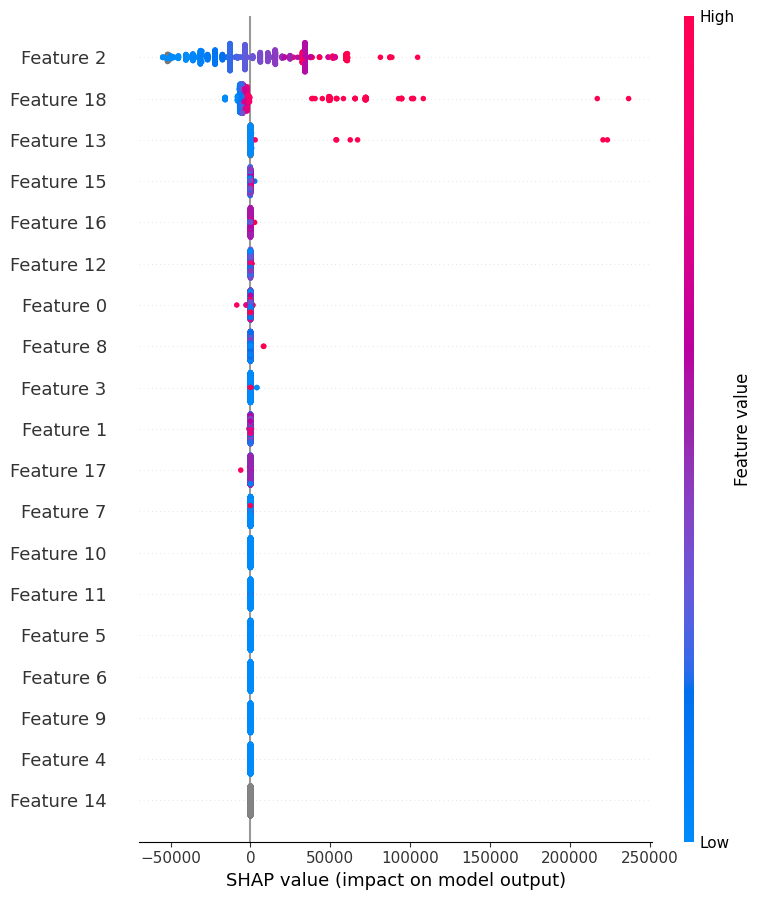

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import shap

# Step 1: Load your CSV data
data = pd.read_csv('final_household_data_with_total_power.csv')

# Step 2: Categorize the dataset into 10 categories based on 'total_power_consumption'
data['consumption_category'] = pd.qcut(data['total_power_consumption'], q=10, labels=False)

# Step 2: Drop the 'household_ID' column from the dataset
# Replace 'household_ID' with the actual name of the column you want to drop
data = data.drop(columns=['household_ID'])

# Step 3: Split into features (X) and target (y)
X = data.drop(columns=['total_power_consumption'])  # Replace 'total_power_consumption' with the actual target column name
y = data['total_power_consumption']  # Replace with your target column name

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the XGBoost model (using decision trees)
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.2, max_depth=8, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False) ** 0.5
print(f"RMSE: {rmse}")

# Step 8: Use SHAP for model interpretability
# Initialize SHAP explainer with the trained model and training data
explainer = shap.Explainer(model, X_train_scaled)

# Step 9: Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Step 10: Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled)

# Optional: Plot SHAP dependence plot for a particular feature (e.g., 'feature_name')
# shap.dependence_plot('feature_name', shap_values, X_test_scaled)
